In [1]:
from sklearn.model_selection import train_test_split
import joblib
import pandas as pd
# Loading the dataset;
or_db = pd.read_excel("../Dataset/Cleaned_dataset.xlsx")
db = or_db[or_db["luogoTC_codificato"] == 1]
val_set = or_db[or_db["luogoTC_codificato"] != 1]

y_full = db.pop("maligno")
X_train_full = db

y_test = val_set.pop("maligno")
X_test = val_set

In [2]:
from sklearn.metrics import confusion_matrix

def compute_sensitivity_specificity_npv(y_true, y_pred):
    """
    Compute sensitivity, specificity, and NPV from true labels and predictions.

    Parameters:
    y_true (list or array): True binary labels (0 or 1).
    y_pred (list or array): Predicted binary labels (0 or 1).

    Returns:
    dict: A dictionary with sensitivity, specificity, and NPV.
    """
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    
    sensitivity = tp / (tp + fn) if (tp + fn) > 0 else 0
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0
    npv = tn / (tn + fn) if (tn + fn) > 0 else 0
    print("True Negative", tn)
    print("False Negatives", fn)
    return {
        "Sensitivity": round(sensitivity, 3),
        "Specificity": round(specificity, 3),
        "NPV": round(npv, 3)
    }

## Binary Classification using all the classes

In [3]:
# Path of the saved pipeline on the local pc
path = "../Elements/Boruta_RusBoost/AcrossSplits/Split_FINALBoruta_RusBoostFitted_pipeline.pkl"

In [4]:
loaded_pipeline = joblib.load(path) # to load the model

In [5]:
# removing the id and the subtypes of a given dataset
def extract_PATIENT_INFO(db):
    ids =  db.pop("ID")
    morf_codificata = db.pop("morf_codificata")
    luogo_tc = db.pop("luogoTC_codificato")
    return db, ids, morf_codificata, luogo_tc

In [6]:
X_test, ids_test, morf_codificata_test,  luogo_tc = extract_PATIENT_INFO(X_test) #to remove the patient infos

predictions = loaded_pipeline.predict(X_test)
predictions

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,

In [7]:
from sklearn.metrics import  accuracy_score, confusion_matrix,precision_score, recall_score, f1_score,roc_auc_score,roc_curve,precision_recall_curve, average_precision_score
f1 = round(f1_score(y_test, predictions),3)
f1

0.789

In [8]:
compute_sensitivity_specificity_npv(y_test, predictions)

True Negative 371
False Negatives 4


{'Sensitivity': 0.957, 'Specificity': 0.894, 'NPV': 0.989}

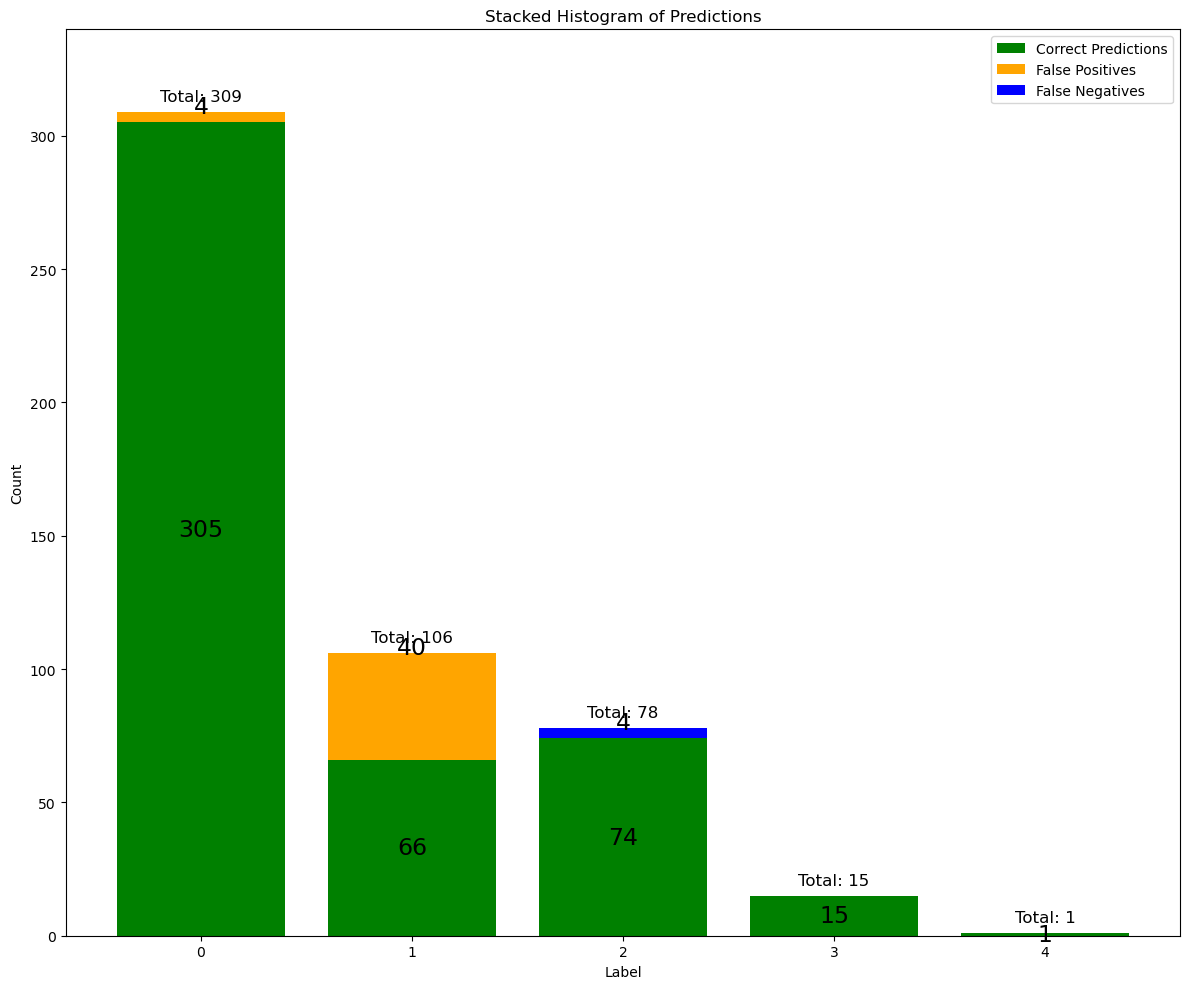

In [9]:
from Components import ErrorAnalysis
ErrorAnalysis.StackedHist(predictions=predictions, y_test=y_test, morf_codificata_test=morf_codificata_test)

In [10]:
from sklearn.model_selection import train_test_split
import joblib
import pandas as pd
# Loading the dataset;
or_db = pd.read_excel("../Dataset/Cleaned_dataset.xlsx")
db = or_db[or_db["luogoTC_codificato"] == 1]
val_set = or_db[or_db["luogoTC_codificato"] != 1]

y_full = db.pop("maligno")
X_train_full = db

y_test = val_set.pop("maligno")
X_test = val_set

In [11]:
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

'''
INPUT: PREDICTIONS, LABELS, AND SUBTYPES
OUTPUT: NONE (SHOWING THE STACKED HISTOGRAM OF ERRORS)
'''
def StackedHist(predictions, y_test,morf_codificata_test):
    # Calculate indices for correct predictions, false positives, and false negatives
    cp_index = (predictions == y_test)
    fp_index = (predictions == 1) & (y_test == 0)
    fn_index = (predictions == 0) & (y_test == 1)

    # Filter labels for CP, FP, and FN
    cp_labels = pd.Series(morf_codificata_test[cp_index])
    fp_labels = pd.Series(morf_codificata_test[fp_index])
    fn_labels = pd.Series(morf_codificata_test[fn_index])

    # Get value counts for CP, FP, and FN
    cp_counts = cp_labels.value_counts().sort_index()
    fp_counts = fp_labels.value_counts().sort_index()
    fn_counts = fn_labels.value_counts().sort_index()

    # Ensure all labels are present in each series
    all_labels = sorted(set(cp_counts.index) | set(fp_counts.index) | set(fn_counts.index))
    cp_counts = cp_counts.reindex(all_labels, fill_value=0)
    fp_counts = fp_counts.reindex(all_labels, fill_value=0)
    fn_counts = fn_counts.reindex(all_labels, fill_value=0)

    # Create the plot
    fig, ax = plt.subplots(figsize=(12, 10))  # Width: 12 inches, Height: 10 inches

    # Stack CP, FP, and FN
    bars_cp = ax.bar(all_labels, cp_counts, label='Correct Predictions', color='green')
    bars_fp = ax.bar(all_labels, fp_counts, bottom=cp_counts, label='False Positives', color='orange')
    bars_fn = ax.bar(all_labels, fn_counts, bottom=cp_counts + fp_counts, label='False Negatives', color='blue')

    ax.legend(fontsize=16)  # Adjust the font size as needed

    # Annotate each segment with its count
    def annotate_bars(bars, prev_heights=None, fontsize=14):
        for idx, bar in enumerate(bars):
            height = bar.get_height()
            y_position = height / 2 if prev_heights is None else prev_heights[idx] + height  + 1
            if height > 0:
                ax.annotate(f'{height}', (bar.get_x() + bar.get_width() / 2, y_position), ha='center', va='center', fontsize=fontsize,color='black')

    annotate_bars(bars_cp, fontsize=17)  # Increase font size for annotations
    annotate_bars(bars_fp, cp_counts.values, fontsize=17)
    annotate_bars(bars_fn, (cp_counts + fp_counts).values, fontsize=17)

    # Annotate each bin with the total count# Annotate each bin with the total count
    max_total  = 25
    total_offset = 0.1 * max_total  # You can adjust this value to change the space between the bar and the total count
    iter= [0,1,2,3,4,5]
    for idx, label in enumerate(iter):
        if label in all_labels:
            total = int(cp_counts[label] + fp_counts[label] + fn_counts[label])
            ax.annotate(f'Total: {total}', (idx, total + total_offset), ha='center', fontsize=16, color='black')  # Move total count further from the bar

    # Adjust y-limit based on the maximum total count
    max_total = max(cp_counts + fp_counts + fn_counts) + 2
    ax.set_ylim([0, int(max_total + 0.1 * max_total)])

    # Set integer labels on the x-axis
    ax.set_xticks([0,1,2,3,4,5])
    ax.set_xticklabels([0,1,2,3,4,5])

    ax.set_xlim(-0.5, len([0,1,2,3,4,5]) + 0.5)  # This creates space after the last tick (5)
    ax.yaxis.set_major_locator(MaxNLocator(integer=True))

    # Set global font size for legends
    plt.rcParams['legend.fontsize'] = 16  # Adjust as needed

    # Adding labels and title
    plt.xlabel('Label')
    plt.ylabel('Count')
    plt.title('Stacked Histogram of Predictions')

    # Show legend and plot
    plt.legend()
    plt.tight_layout()
    plt.show()



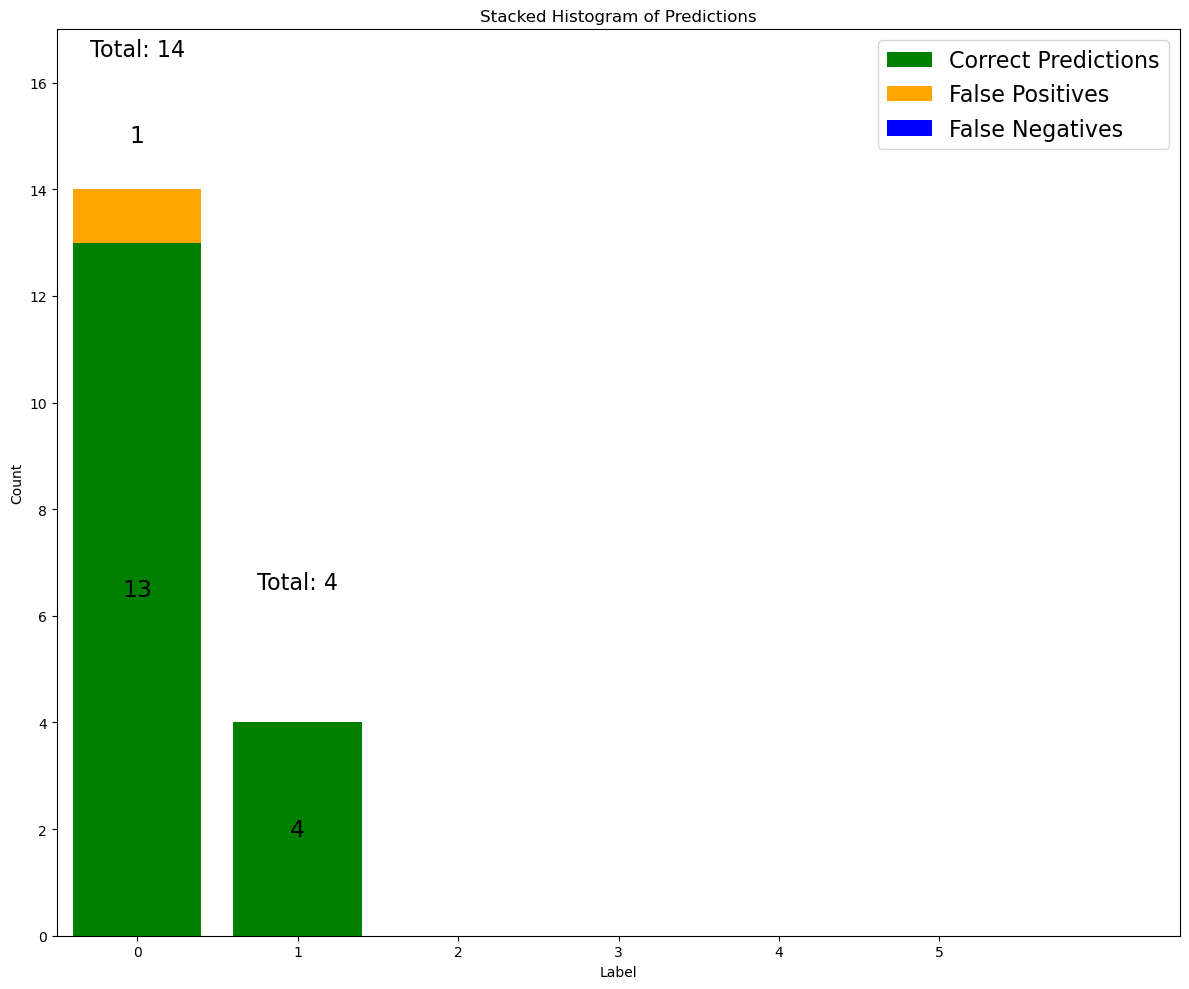

In [12]:
from sklearn.model_selection import train_test_split
import joblib
import pandas as pd
# Loading the dataset;
or_db = pd.read_excel("../Dataset/Cleaned_dataset.xlsx")
db = or_db[or_db["luogoTC_codificato"] == 1]
val_set = or_db[or_db["luogoTC_codificato"] != 1]

y_full = db.pop("maligno")
X_train_full = db

y_test = val_set.pop("maligno")
X_test = val_set

center2 = X_test[X_test["luogoTC_codificato"] == 2]
y_center2 = y_test[X_test["luogoTC_codificato"] == 2]

X_test, ids_test, morf_codificata_test,  luogo_tc = extract_PATIENT_INFO(center2.copy()) #to remove the patient infos

predictions = loaded_pipeline.predict(X_test)

StackedHist(predictions=predictions, y_test=y_center2, morf_codificata_test=morf_codificata_test)

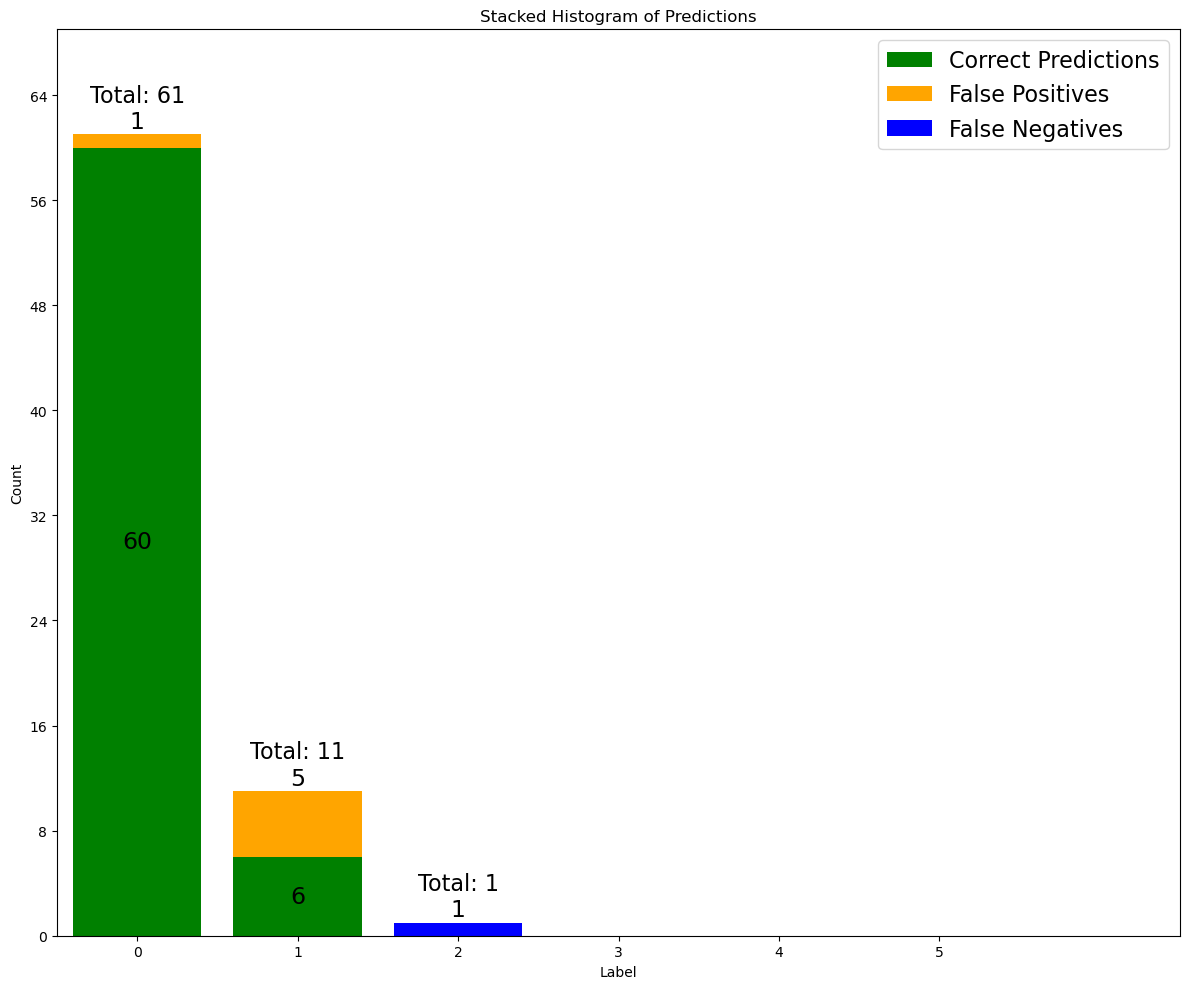

In [13]:

from sklearn.model_selection import train_test_split
import joblib
import pandas as pd
# Loading the dataset;
or_db = pd.read_excel("../Dataset/Cleaned_dataset.xlsx")
db = or_db[or_db["luogoTC_codificato"] == 1]
val_set = or_db[or_db["luogoTC_codificato"] != 1]

y_full = db.pop("maligno")
X_train_full = db

y_test = val_set.pop("maligno")
X_test = val_set

center2 = X_test[X_test["luogoTC_codificato"] == 3]
y_center2 = y_test[X_test["luogoTC_codificato"] == 3]

X_test, ids_test, morf_codificata_test,  luogo_tc = extract_PATIENT_INFO(center2.copy()) #to remove the patient infos

predictions = loaded_pipeline.predict(X_test)

StackedHist(predictions=predictions, y_test=y_center2, morf_codificata_test=morf_codificata_test)

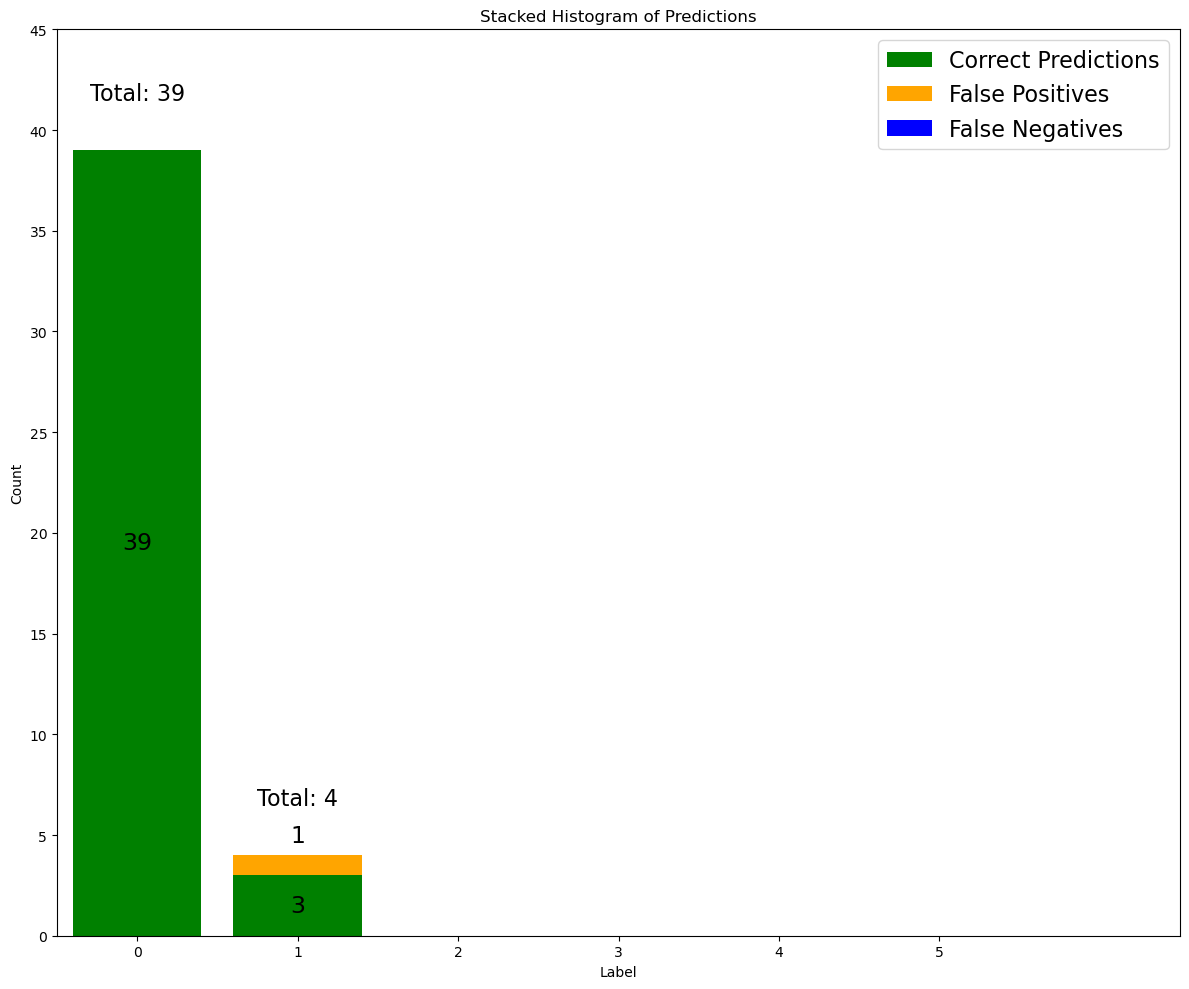

In [14]:

from sklearn.model_selection import train_test_split
import joblib
import pandas as pd
# Loading the dataset;
or_db = pd.read_excel("../Dataset/Cleaned_dataset.xlsx")
db = or_db[or_db["luogoTC_codificato"] == 1]
val_set = or_db[or_db["luogoTC_codificato"] != 1]

y_full = db.pop("maligno")
X_train_full = db

y_test = val_set.pop("maligno")
X_test = val_set

center2 = X_test[X_test["luogoTC_codificato"] == 4]
y_center2 = y_test[X_test["luogoTC_codificato"] == 4]

X_test, ids_test, morf_codificata_test,  luogo_tc = extract_PATIENT_INFO(center2.copy()) #to remove the patient infos

predictions = loaded_pipeline.predict(X_test)

StackedHist(predictions=predictions, y_test=y_center2, morf_codificata_test=morf_codificata_test)

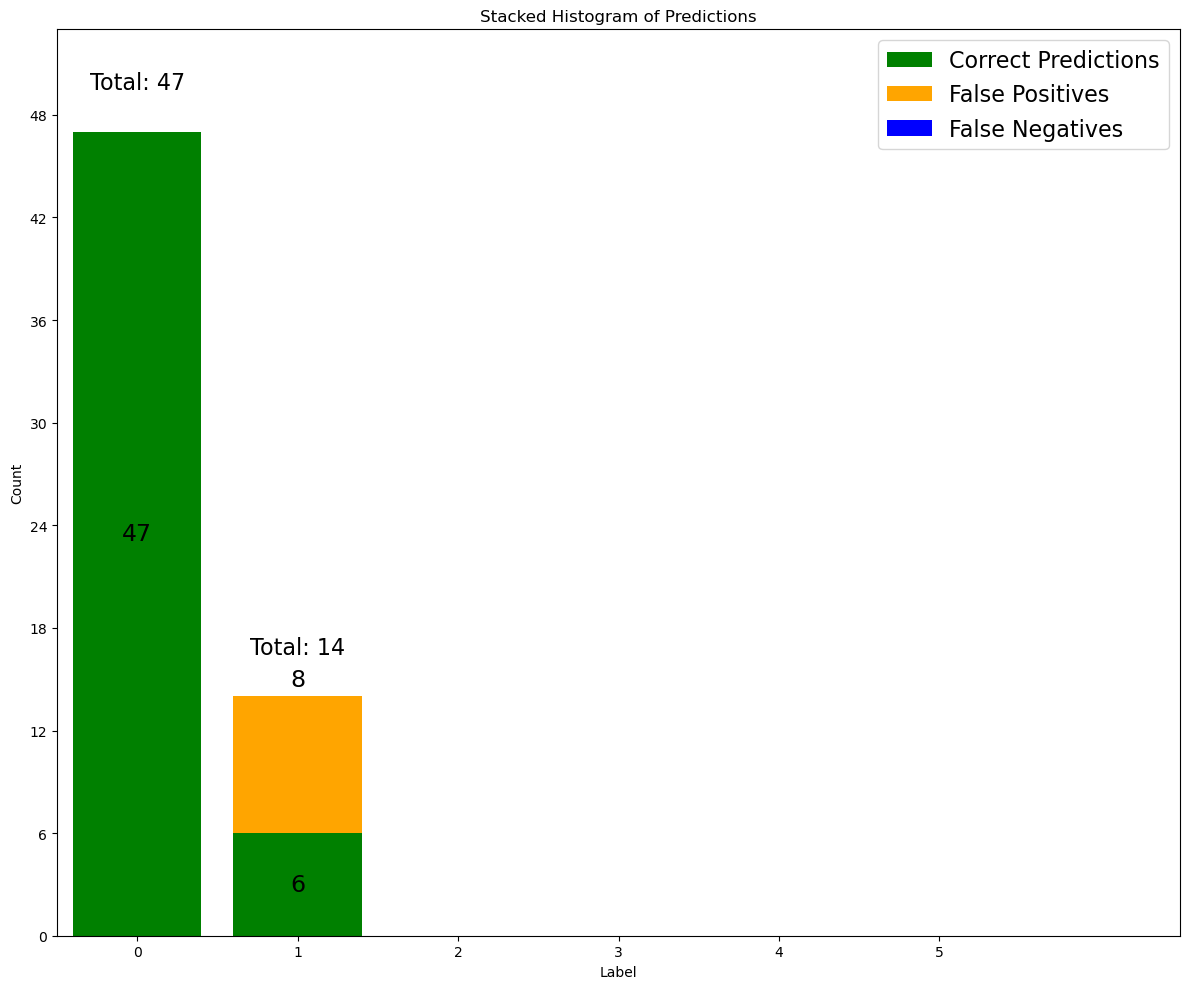

In [15]:

from sklearn.model_selection import train_test_split
import joblib
import pandas as pd
# Loading the dataset;
or_db = pd.read_excel("../Dataset/Cleaned_dataset.xlsx")
db = or_db[or_db["luogoTC_codificato"] == 1]
val_set = or_db[or_db["luogoTC_codificato"] != 1]

y_full = db.pop("maligno")
X_train_full = db

y_test = val_set.pop("maligno")
X_test = val_set

center2 = X_test[X_test["luogoTC_codificato"] == 5]
y_center2 = y_test[X_test["luogoTC_codificato"] == 5]

X_test, ids_test, morf_codificata_test,  luogo_tc = extract_PATIENT_INFO(center2.copy()) #to remove the patient infos

predictions = loaded_pipeline.predict(X_test)

StackedHist(predictions=predictions, y_test=y_center2, morf_codificata_test=morf_codificata_test)

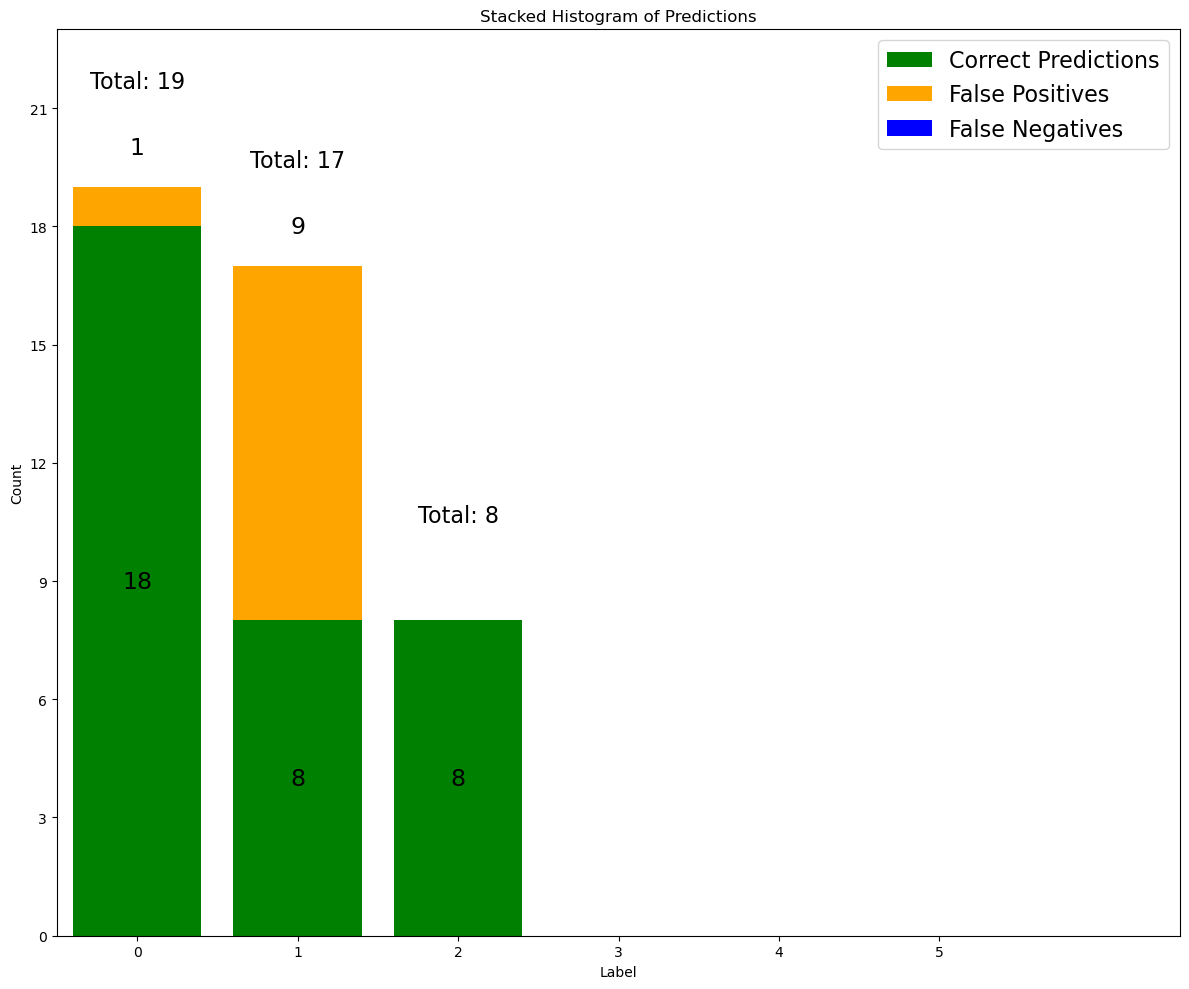

In [16]:

from sklearn.model_selection import train_test_split
import joblib
import pandas as pd
# Loading the dataset;
or_db = pd.read_excel("../Dataset/Cleaned_dataset.xlsx")
db = or_db[or_db["luogoTC_codificato"] == 1]
val_set = or_db[or_db["luogoTC_codificato"] != 1]

y_full = db.pop("maligno")
X_train_full = db

y_test = val_set.pop("maligno")
X_test = val_set

center2 = X_test[X_test["luogoTC_codificato"] == 6]
y_center2 = y_test[X_test["luogoTC_codificato"] == 6]

X_test, ids_test, morf_codificata_test,  luogo_tc = extract_PATIENT_INFO(center2.copy()) #to remove the patient infos

predictions = loaded_pipeline.predict(X_test)

StackedHist(predictions=predictions, y_test=y_center2, morf_codificata_test=morf_codificata_test)

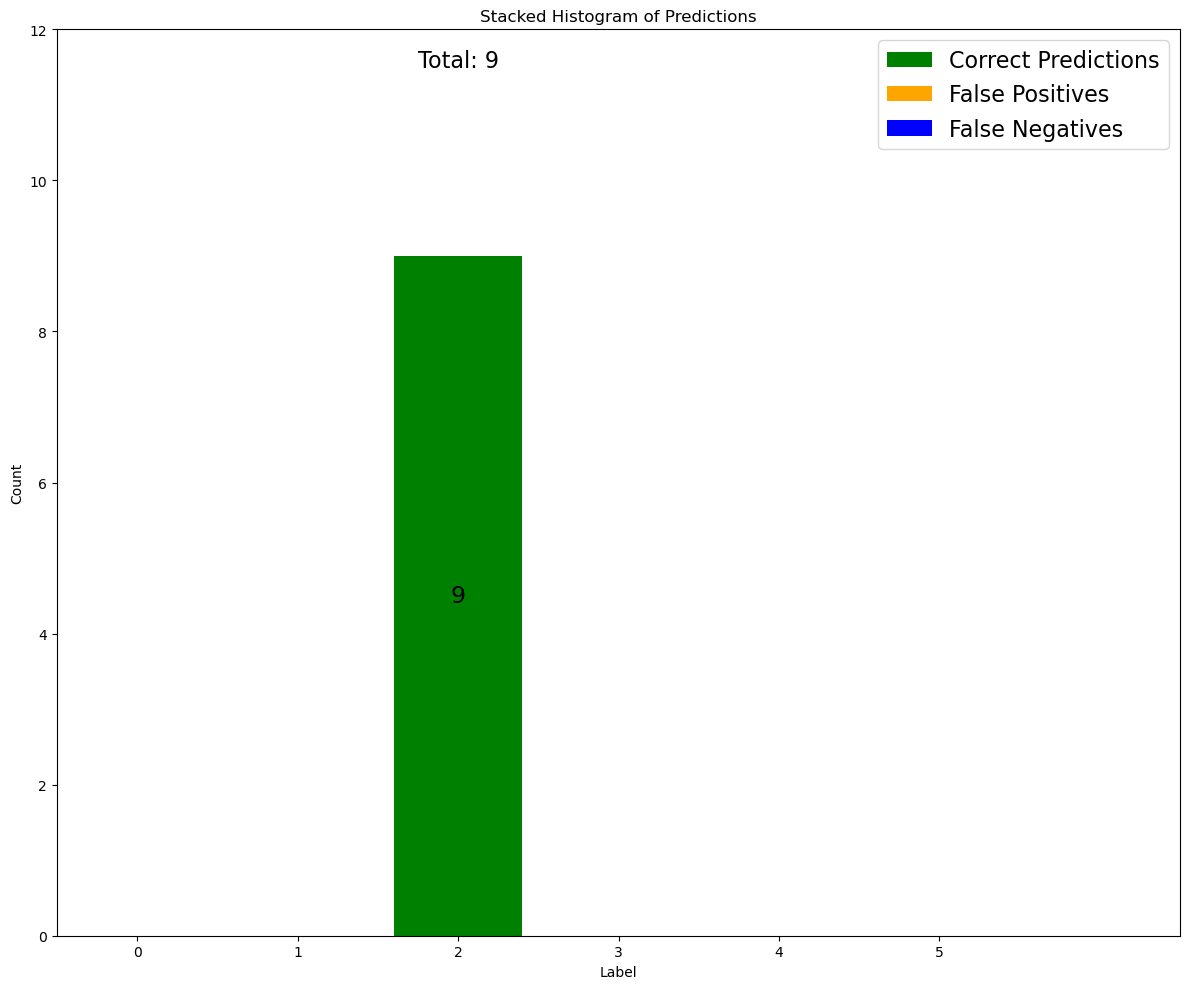

array([1, 1, 1, 1, 1, 1, 1, 1, 1])

In [17]:

from sklearn.model_selection import train_test_split
import joblib
import pandas as pd
# Loading the dataset;
or_db = pd.read_excel("../Dataset/Cleaned_dataset.xlsx")
db = or_db[or_db["luogoTC_codificato"] == 1]
val_set = or_db[or_db["luogoTC_codificato"] != 1]

y_full = db.pop("maligno")
X_train_full = db

y_test = val_set.pop("maligno")
X_test = val_set

center2 = X_test[X_test["luogoTC_codificato"] == 7]
y_center2 = y_test[X_test["luogoTC_codificato"] == 7]


X_test, ids_test, morf_codificata_test,  luogo_tc = extract_PATIENT_INFO(center2.copy()) #to remove the patient infos

predictions = loaded_pipeline.predict(X_test)

StackedHist(predictions=predictions, y_test=y_center2, morf_codificata_test=morf_codificata_test)

predictions

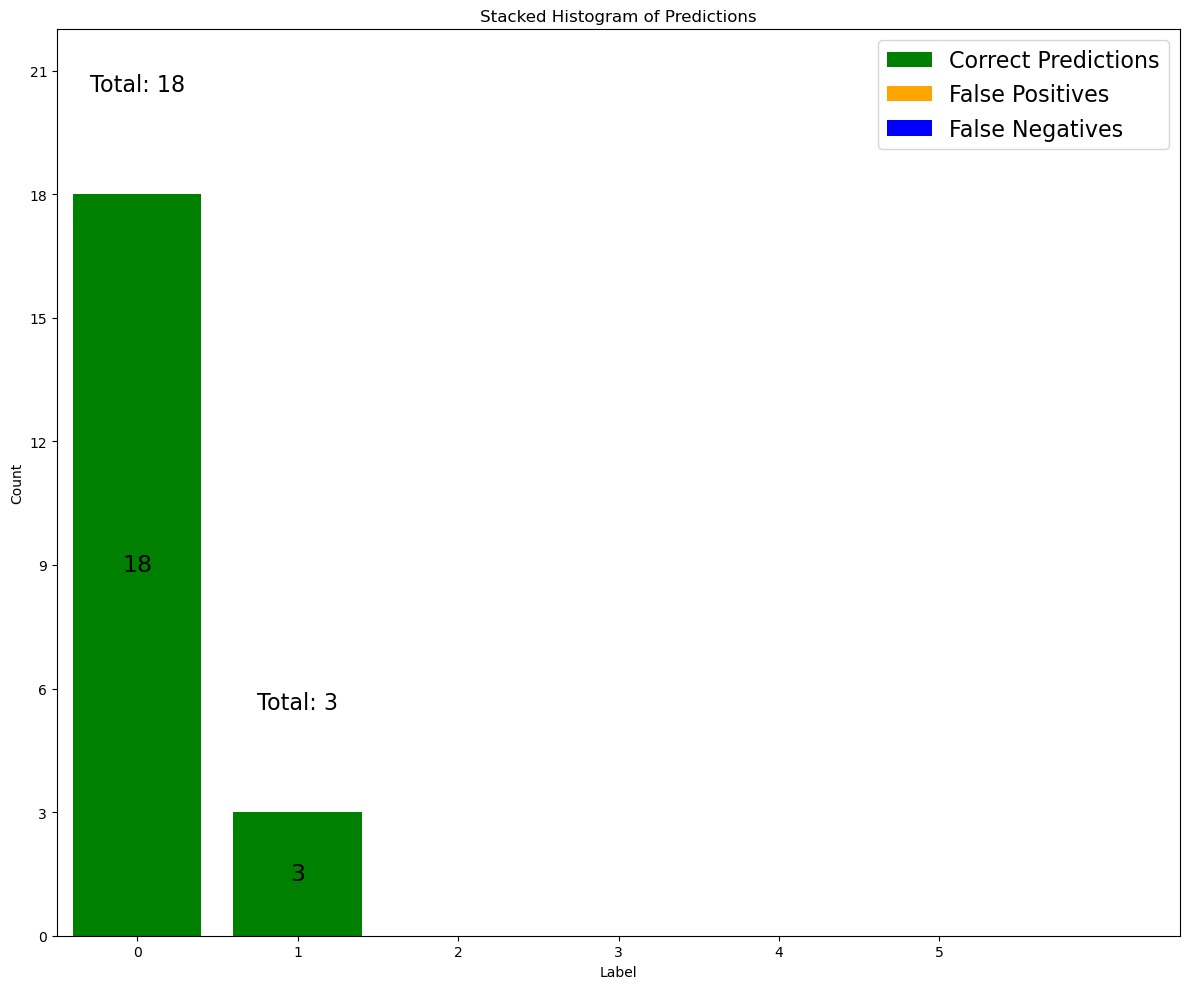

In [18]:

from sklearn.model_selection import train_test_split
import joblib
import pandas as pd
# Loading the dataset;
or_db = pd.read_excel("../Dataset/Cleaned_dataset.xlsx")
db = or_db[or_db["luogoTC_codificato"] == 1]
val_set = or_db[or_db["luogoTC_codificato"] != 1]

y_full = db.pop("maligno")
X_train_full = db

y_test = val_set.pop("maligno")
X_test = val_set

center2 = X_test[X_test["luogoTC_codificato"] == 8]
y_center2 = y_test[X_test["luogoTC_codificato"] == 8]

X_test, ids_test, morf_codificata_test,  luogo_tc = extract_PATIENT_INFO(center2.copy()) #to remove the patient infos

predictions = loaded_pipeline.predict(X_test)

StackedHist(predictions=predictions, y_test=y_center2, morf_codificata_test=morf_codificata_test)

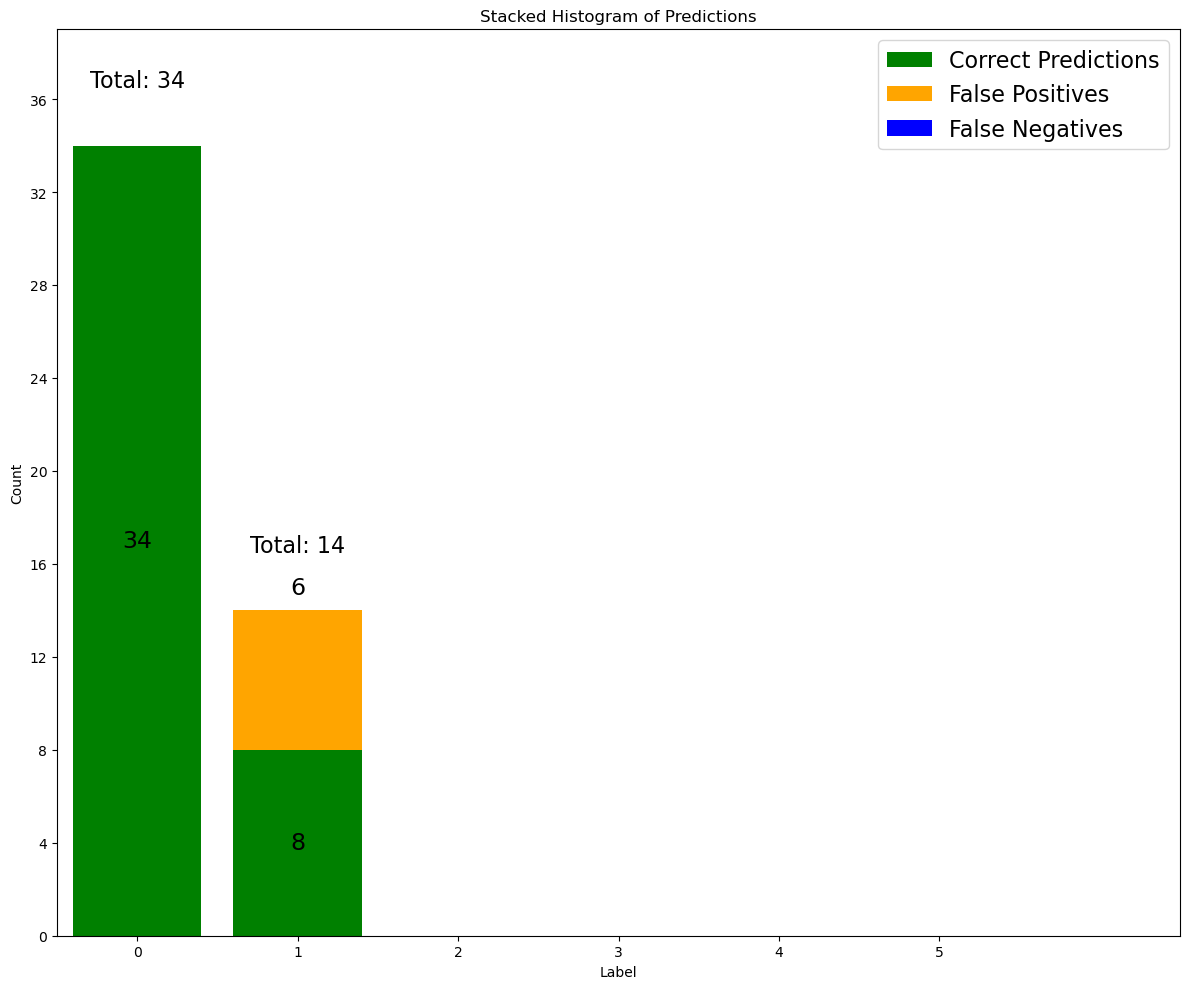

In [19]:

from sklearn.model_selection import train_test_split
import joblib
import pandas as pd
# Loading the dataset;
or_db = pd.read_excel("../Dataset/Cleaned_dataset.xlsx")
db = or_db[or_db["luogoTC_codificato"] == 1]
val_set = or_db[or_db["luogoTC_codificato"] != 1]

y_full = db.pop("maligno")
X_train_full = db

y_test = val_set.pop("maligno")
X_test = val_set

center2 = X_test[X_test["luogoTC_codificato"] == 9]
y_center2 = y_test[X_test["luogoTC_codificato"] == 9]

X_test, ids_test, morf_codificata_test,  luogo_tc = extract_PATIENT_INFO(center2.copy()) #to remove the patient infos

predictions = loaded_pipeline.predict(X_test)

StackedHist(predictions=predictions, y_test=y_center2, morf_codificata_test=morf_codificata_test)

In [20]:
def StackedHist(predictions, y_test,morf_codificata_test):
    # Calculate indices for correct predictions, false positives, and false negatives
    cp_index = (predictions == y_test)
    fp_index = (predictions == 1) & (y_test == 0)
    fn_index = (predictions == 0) & (y_test == 1)

    # Filter labels for CP, FP, and FN
    cp_labels = pd.Series(morf_codificata_test[cp_index])
    fp_labels = pd.Series(morf_codificata_test[fp_index])
    fn_labels = pd.Series(morf_codificata_test[fn_index])

    # Get value counts for CP, FP, and FN
    cp_counts = cp_labels.value_counts().sort_index()
    fp_counts = fp_labels.value_counts().sort_index()
    fn_counts = fn_labels.value_counts().sort_index()

    # Ensure all labels are present in each series
    all_labels = sorted(set(cp_counts.index) | set(fp_counts.index) | set(fn_counts.index))
    cp_counts = cp_counts.reindex(all_labels, fill_value=0)
    fp_counts = fp_counts.reindex(all_labels, fill_value=0)
    fn_counts = fn_counts.reindex(all_labels, fill_value=0)

    # Create the plot
    fig, ax = plt.subplots(figsize=(12, 10))  # Width: 12 inches, Height: 10 inches

    # Stack CP, FP, and FN
    bars_cp = ax.bar(all_labels, cp_counts, label='Correct Predictions', color='green')
    bars_fp = ax.bar(all_labels, fp_counts, bottom=cp_counts, label='False Positives', color='orange')
    bars_fn = ax.bar(all_labels, fn_counts, bottom=cp_counts + fp_counts, label='False Negatives', color='blue')

    ax.legend(fontsize=16)  # Adjust the font size as needed

    # Annotate each segment with its count
    def annotate_bars(bars, prev_heights=None, fontsize=14):
        for idx, bar in enumerate(bars):
            height = bar.get_height()
            y_position = height / 2 if prev_heights is None else prev_heights[idx] + height  + 1
            if height > 0:
                ax.annotate(f'{height}', (bar.get_x() + bar.get_width() / 2, y_position), ha='center', va='center', fontsize=fontsize,color='black')

    annotate_bars(bars_cp, fontsize=17)  # Increase font size for annotations
    annotate_bars(bars_fp, cp_counts.values, fontsize=17)
    annotate_bars(bars_fn, (cp_counts + fp_counts).values, fontsize=17)

    # Annotate each bin with the total count# Annotate each bin with the total count
    max_total  = 5
    total_offset = 0.1 * max_total  # You can adjust this value to change the space between the bar and the total count
    iter= [0,1,2,3,4,5]
    for idx, label in enumerate(iter):
        if label in all_labels:
            total = int(cp_counts[label] + fp_counts[label] + fn_counts[label])
            ax.annotate(f'Total: {total}', (idx, total + total_offset), ha='center', fontsize=16, color='black')  # Move total count further from the bar

    # Adjust y-limit based on the maximum total count
    max_total = max(cp_counts + fp_counts + fn_counts) + 2
    ax.set_ylim([0, int(max_total + 0.1 * max_total)])

    # Set integer labels on the x-axis
    ax.set_xticks([0,1,2,3,4,5])
    ax.set_xticklabels([0,1,2,3,4,5])

    ax.set_xlim(-0.5, len([0,1,2,3,4,5]) + 0.5)  # This creates space after the last tick (5)
    ax.yaxis.set_major_locator(MaxNLocator(integer=True))

    # Set global font size for legends
    plt.rcParams['legend.fontsize'] = 16  # Adjust as needed

    # Adding labels and title
    plt.xlabel('Label')
    plt.ylabel('Count')
    plt.title('Stacked Histogram of Predictions')

    # Show legend and plot
    plt.legend()
    plt.tight_layout()
    plt.show()



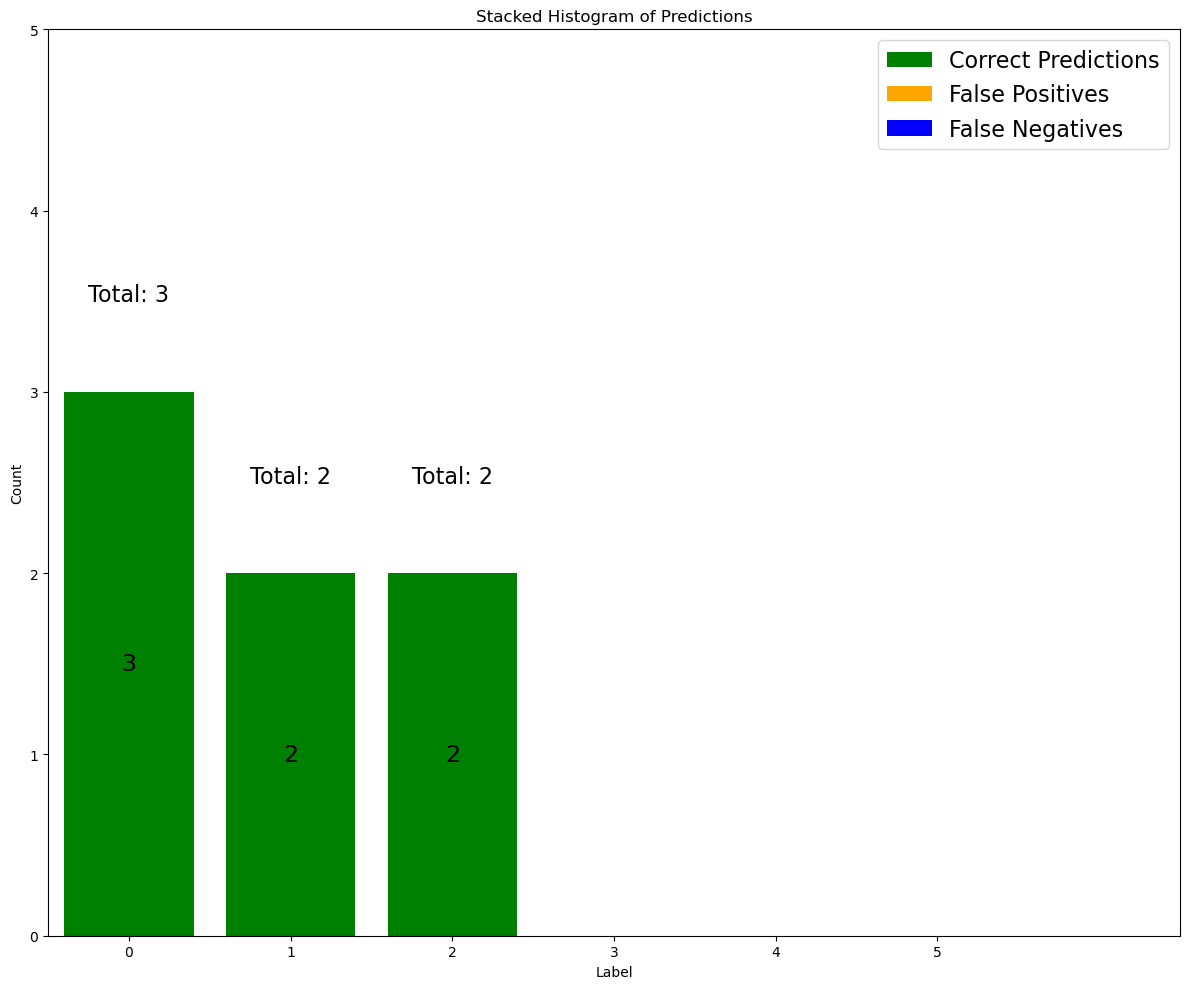

In [21]:

from sklearn.model_selection import train_test_split
import joblib
import pandas as pd
# Loading the dataset;
or_db = pd.read_excel("../Dataset/Cleaned_dataset.xlsx")
db = or_db[or_db["luogoTC_codificato"] == 1]
val_set = or_db[or_db["luogoTC_codificato"] != 1]

y_full = db.pop("maligno")
X_train_full = db

y_test = val_set.pop("maligno")
X_test = val_set

center2 = X_test[X_test["luogoTC_codificato"] == 10]
y_center2 = y_test[X_test["luogoTC_codificato"] == 10]

X_test, ids_test, morf_codificata_test,  luogo_tc = extract_PATIENT_INFO(center2.copy()) #to remove the patient infos

predictions = loaded_pipeline.predict(X_test)

StackedHist(predictions=predictions, y_test=y_center2, morf_codificata_test=morf_codificata_test)

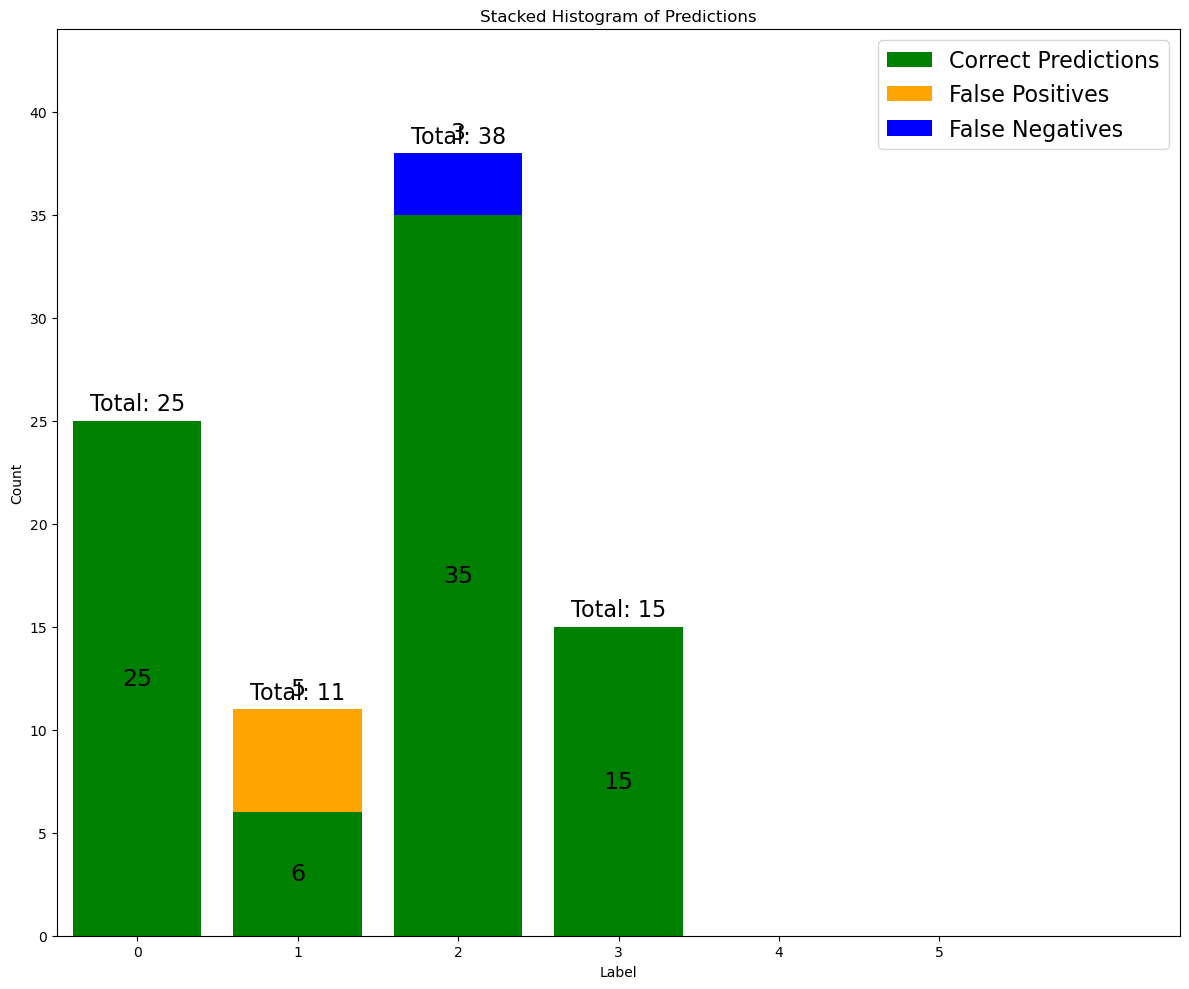

In [22]:

from sklearn.model_selection import train_test_split
import joblib
import pandas as pd
# Loading the dataset;
or_db = pd.read_excel("../Dataset/Cleaned_dataset.xlsx")
db = or_db[or_db["luogoTC_codificato"] == 1]
val_set = or_db[or_db["luogoTC_codificato"] != 1]

y_full = db.pop("maligno")
X_train_full = db

y_test = val_set.pop("maligno")
X_test = val_set

center2 = X_test[X_test["luogoTC_codificato"] == 11]
y_center2 = y_test[X_test["luogoTC_codificato"] == 11]

X_test, ids_test, morf_codificata_test,  luogo_tc = extract_PATIENT_INFO(center2.copy()) #to remove the patient infos

predictions = loaded_pipeline.predict(X_test)

StackedHist(predictions=predictions, y_test=y_center2, morf_codificata_test=morf_codificata_test)

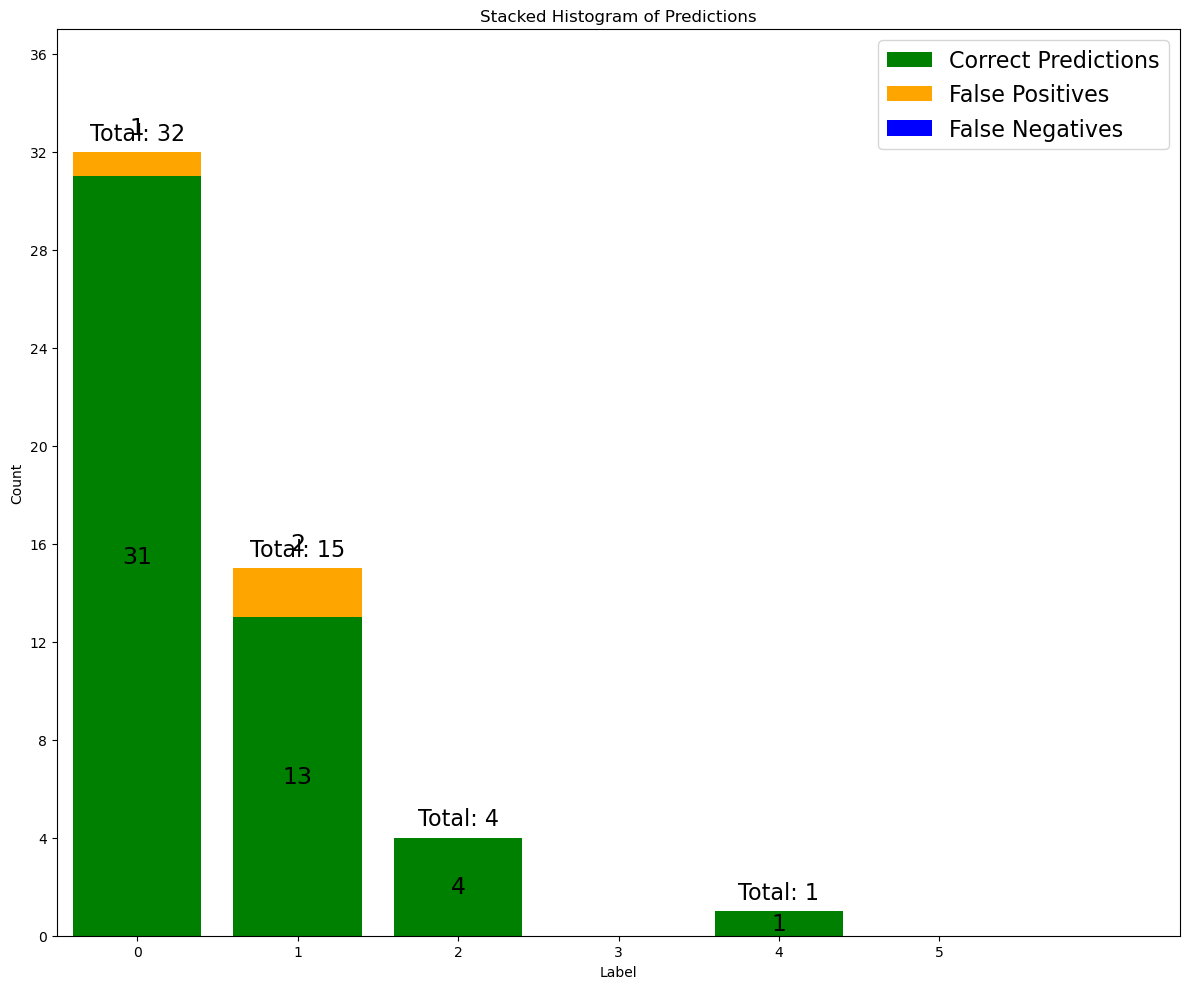

In [23]:

from sklearn.model_selection import train_test_split
import joblib
import pandas as pd
# Loading the dataset;
or_db = pd.read_excel("../Dataset/Cleaned_dataset.xlsx")
db = or_db[or_db["luogoTC_codificato"] == 1]
val_set = or_db[or_db["luogoTC_codificato"] != 1]

y_full = db.pop("maligno")
X_train_full = db

y_test = val_set.pop("maligno")
X_test = val_set

center2 = X_test[X_test["luogoTC_codificato"] == 12]
y_center2 = y_test[X_test["luogoTC_codificato"] == 12]

X_test, ids_test, morf_codificata_test,  luogo_tc = extract_PATIENT_INFO(center2.copy()) #to remove the patient infos

predictions = loaded_pipeline.predict(X_test)

StackedHist(predictions=predictions, y_test=y_center2, morf_codificata_test=morf_codificata_test)

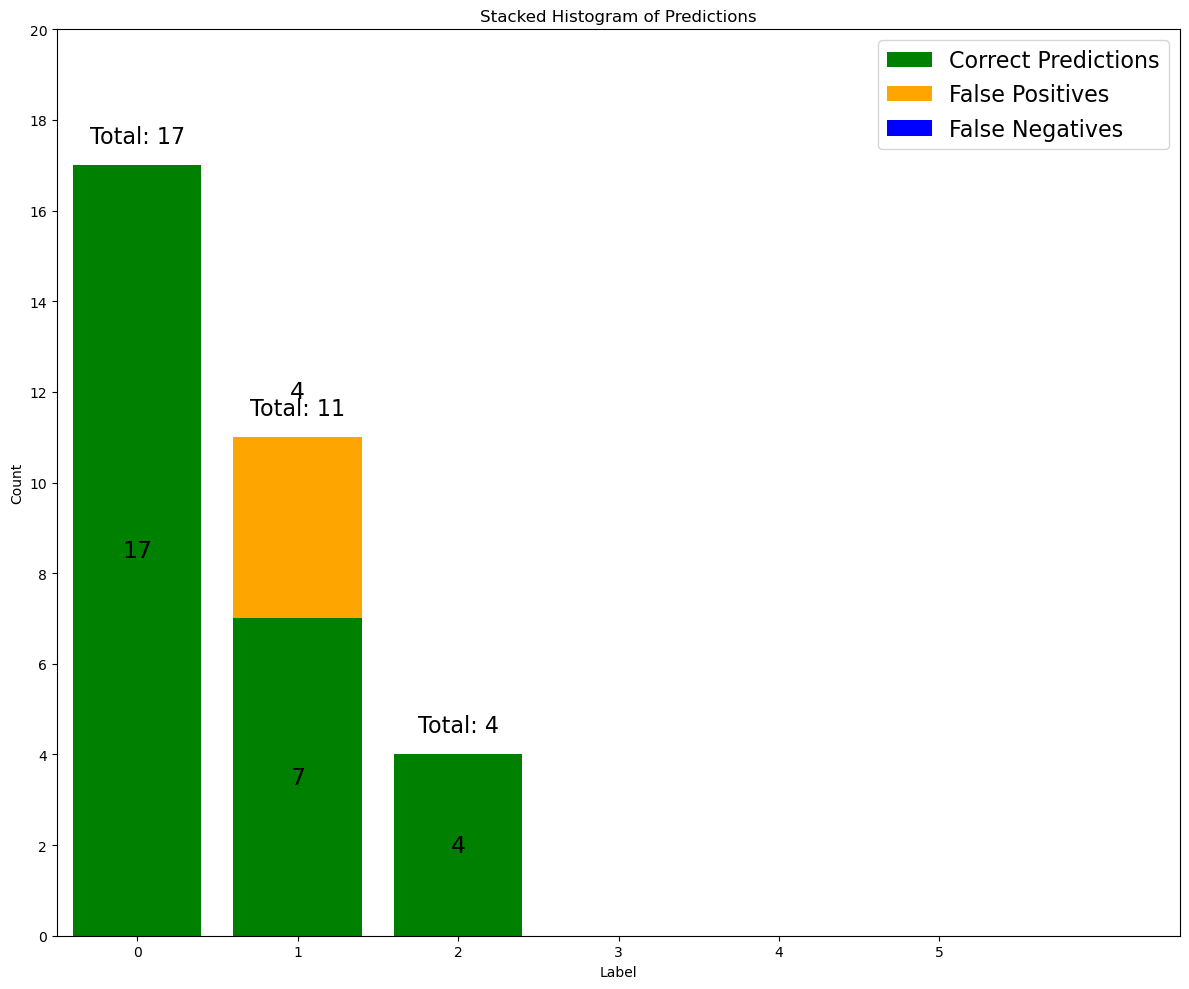

In [24]:

from sklearn.model_selection import train_test_split
import joblib
import pandas as pd
# Loading the dataset;
or_db = pd.read_excel("../Dataset/Cleaned_dataset.xlsx")
db = or_db[or_db["luogoTC_codificato"] == 1]
val_set = or_db[or_db["luogoTC_codificato"] != 1]

y_full = db.pop("maligno")
X_train_full = db

y_test = val_set.pop("maligno")
X_test = val_set

center2 = X_test[X_test["luogoTC_codificato"] == 13]
y_center2 = y_test[X_test["luogoTC_codificato"] == 13]

X_test, ids_test, morf_codificata_test,  luogo_tc = extract_PATIENT_INFO(center2.copy()) #to remove the patient infos

predictions = loaded_pipeline.predict(X_test)

StackedHist(predictions=predictions, y_test=y_center2, morf_codificata_test=morf_codificata_test)

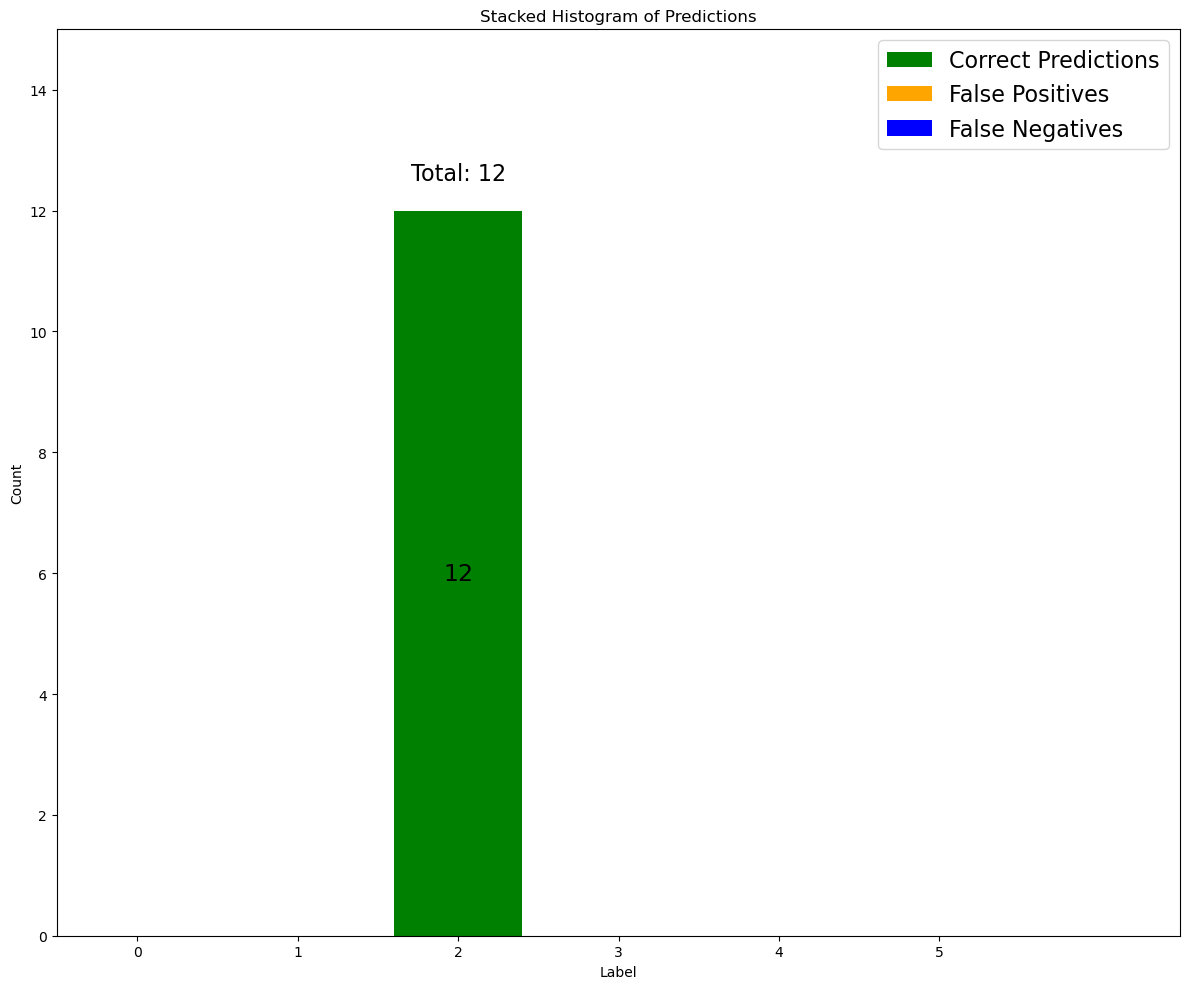

In [25]:

from sklearn.model_selection import train_test_split
import joblib
import pandas as pd
# Loading the dataset;
or_db = pd.read_excel("../Dataset/Cleaned_dataset.xlsx")
db = or_db[or_db["luogoTC_codificato"] == 1]
val_set = or_db[or_db["luogoTC_codificato"] != 1]

y_full = db.pop("maligno")
X_train_full = db

y_test = val_set.pop("maligno")
X_test = val_set

center2 = X_test[X_test["luogoTC_codificato"] == 14]
y_center2 = y_test[X_test["luogoTC_codificato"] == 14]

X_test, ids_test, morf_codificata_test,  luogo_tc = extract_PATIENT_INFO(center2.copy()) #to remove the patient infos

predictions = loaded_pipeline.predict(X_test)

StackedHist(predictions=predictions, y_test=y_center2, morf_codificata_test=morf_codificata_test)